# MLPR Task 3: Classification Phase

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, linear_model, datasets, svm

In [22]:
# import & read dataset
data = pd.read_csv('task_3_training.csv')

# drop pianist_id, segment_id and snippet_id
data = data.drop(['pianist_id', 'segment_id', 'snippet_id'], axis = 1)

#create X (features) and y (response), also drop target values
y = data['quadrant']
X = data.drop(['quadrant','valence', 'arousal'], axis = 1)
y

0       3.0
1       3.0
2       3.0
3       3.0
4       3.0
       ... 
2277    1.0
2278    1.0
2279    1.0
2280    1.0
2281    1.0
Name: quadrant, Length: 2282, dtype: float64

In [3]:
# divide entire dataset into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
# classification accuracy with KNN with k = 20
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.36542669584245074


In [5]:
# now use cross-validation for knn:
knn = KNeighborsClassifier(n_neighbors = 50)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores

array([0.37117904, 0.41484716, 0.44298246, 0.34210526, 0.33333333,
       0.36403509, 0.3245614 , 0.40350877, 0.36842105, 0.34210526])

In [6]:
scores.mean()

0.37070788324523096

In [7]:
# look for optimal k for kNN
k_scores = []
for k in range(1,300,5):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

Text(0, 0.5, 'accuracy')

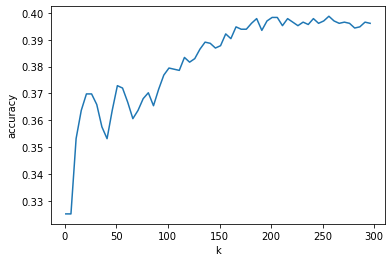

In [8]:
# plot k vs accuracy
plt.plot(range(1,300,5), k_scores)
plt.xlabel('k')
plt.ylabel('accuracy')

## Model selection: compare different models on the dataset

K-nearest Neighbors

In [9]:
knn = KNeighborsClassifier(n_neighbors = 200)
score_knn = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
score_knn

0.3974143874971271

Logistic Regression

In [16]:
logreg = linear_model.LogisticRegression(solver='liblinear')
score_LR = cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()
score_LR

0.33914425802497516

Random Forest Classifier

In [17]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.899343544857768

In [18]:
clf = RandomForestClassifier(n_estimators = 100)
score_clf = cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean()

SVM

In [ ]:
# dauert zu lange

In [ ]:
svec = svm.SVC(kernel='linear')
svec.fit(X_train, y_train)
plot_decision_function(X_train, y_train, X_test, y_test, svec)

In [ ]:
svec_predictions = svec.predict(X_test)
metrics.accuracy_score(y_test,svec_predictions)

In [ ]:
svec = svm.SVC(kernel='linear')
score_svm = cross_val_score(svec, X, y, cv=10, scoring='accuracy').mean()

### compare and visualize the results

Text(0, 0.5, 'Score')

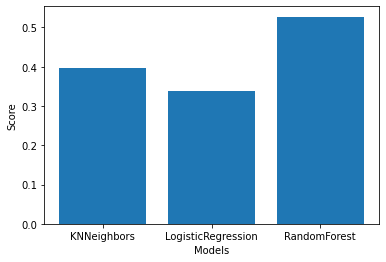

In [20]:
models = ['KNNeighbors', 'LogisticRegression', 'RandomForest']
scores = [score_knn, score_LR, score_clf]

plt.bar(models, scores)
plt.xlabel('Models')
plt.ylabel('Score')